In [1]:
import pandas as pd  # For handling dataset
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For better plots
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.linear_model import LinearRegression  # Model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics

In [4]:
# Load dataset
df = pd.read_csv("USA_Housing.csv")

# Show first 5 rows
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [5]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
# Summary statistics
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
# Check if there are missing values
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [11]:
print(df.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [12]:
# Selecting only one feature
X = df[['Avg. Area Number of Rooms']]  # Feature
y = df['Price']  # Target variable

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 420698.60700438253
Coefficient: 115883.23840944545


In [14]:
# Predict on test data
y_pred = model.predict(X_test)

# Compare actual vs predicted values
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison.head())


            Actual     Predicted
1501  1.339096e+06  1.167016e+06
2586  1.251794e+06  1.222788e+06
2653  1.340095e+06  1.192778e+06
1055  1.431508e+06  1.333114e+06
705   1.042374e+06  1.173254e+06


In [15]:
# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 263848.3886469575
Mean Squared Error (MSE): 107666516394.19522
Root Mean Squared Error (RMSE): 328125.76307598164


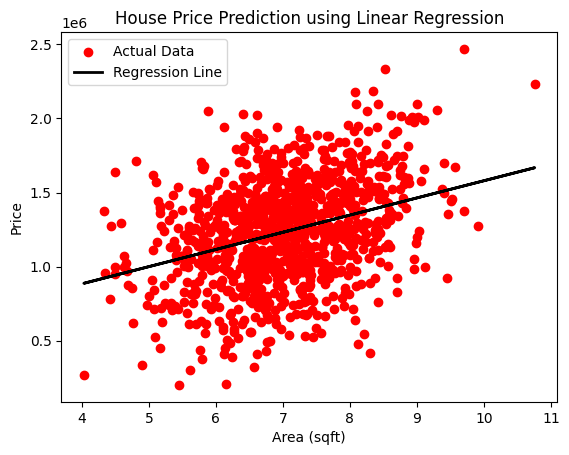

In [18]:
plt.scatter(X_test, y_test, color='r', label="Actual Data")
plt.plot(X_test, y_pred, color='k', linewidth=2, label="Regression Line")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.title("House Price Prediction using Linear Regression")
plt.legend()
plt.show()
